In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


From original plant dataset tomato directory selected for training and testing with only 200 images from each disease. There are 3 diseases and 1 healthy. Total 4 directories selected each for training and testing so total 1600 images considered.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
import numpy as np

Dataset is stored on google drive with Train and Test folder.

In [ ]:
train_dir = r'/content/drive/MyDrive/Colab_Notebooks/3/A/Train'
test_dir = r'/content/drive/MyDrive/Colab_Notebooks/3/A/Test'

In [ ]:
img_size = 224
batch_size = 32

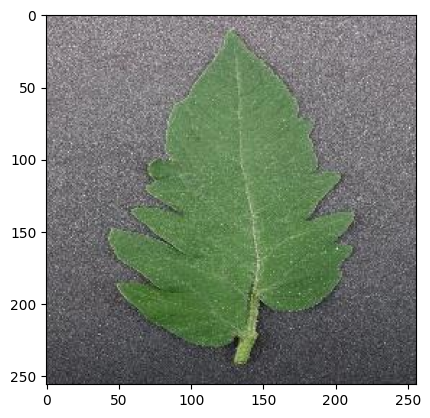

In [ ]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img

# reading the image
testImage = img.imread('/content/drive/MyDrive/Colab_Notebooks/3/A/Train/Tomato___healthy/000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG')

# displaying the image
plt.imshow(testImage)

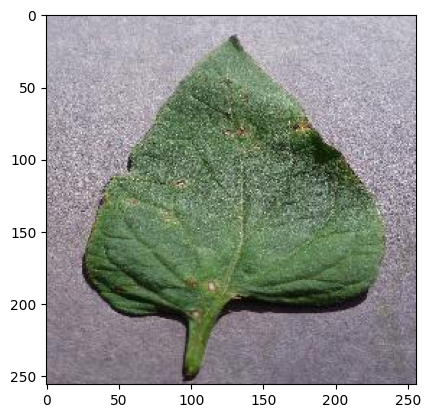

In [ ]:
# importing required libraries
import matplotlib.pyplot as plt
import matplotlib.image as img

# reading the image
testImage = img.imread('/content/drive/MyDrive/Colab_Notebooks/3/A/Train/Tomato___Target_Spot/c6a1dc1f-e0fd-40df-8726-5db2b0be7150___Com.G_TgS_FL 0736.JPG')

# displaying the image
plt.imshow(testImage)


Image Preprocessing

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical')

Found 800 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(test_dir,target_size=(img_size,img_size),batch_size=batch_size,class_mode='categorical')

Found 800 images belonging to 4 classes.


Categories are identified.

In [ ]:
class_names=list(train_generator.class_indices)
class_names

['Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

In [ ]:
class_names=list(test_generator.class_indices)
class_names

['Tomato___Target_Spot',
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 'Tomato___Tomato_mosaic_virus',
 'Tomato___healthy']

Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense,Dropout, BatchNormalization

In [ ]:
model = Sequential()
model.add((Conv2D(32, (3,3), activation='relu', input_shape=(img_size,img_size, 3))))
model.add(BatchNormalization())
model.add((MaxPooling2D(2,2)))
model.add((Conv2D(64, (3,3), activation='relu')))
model.add(BatchNormalization())
model.add((MaxPooling2D(2,2)))
model.add((Conv2D(64, (3,3), activation='relu')))
model.add(BatchNormalization())
model.add((MaxPooling2D(2,2)))
model.add((Conv2D(128, (3,3), activation='relu')))
model.add(BatchNormalization())
model.add((MaxPooling2D(2,2)))
model.add((Flatten()))
model.add((Dense(128, activation='relu')))
model.add((Dropout(0.2)))
model.add((Dense(64, activation='relu')))
model.add((Dense(train_generator.num_classes, activation='softmax')))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 222, 222, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 109, 109, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_generator, epochs=50, validation_data=test_generator)

Epoch 1/50
25/25 [==============================] - 86s 4s/step - loss: 0.2873 - accuracy: 0.9325 - val_loss: 5.2645 - val_accuracy: 0.2500
Epoch 2/50
25/25 [==============================] - 7s 293ms/step - loss: 0.2720 - accuracy: 0.9425 - val_loss: 9.3248 - val_accuracy: 0.2500
Epoch 3/50
25/25 [==============================] - 8s 329ms/step - loss: 0.3011 - accuracy: 0.9438 - val_loss: 15.0623 - val_accuracy: 0.2500
Epoch 4/50
25/25 [==============================] - 9s 359ms/step - loss: 0.1616 - accuracy: 0.9638 - val_loss: 17.6249 - val_accuracy: 0.2500
Epoch 5/50
25/25 [==============================] - 7s 291ms/step - loss: 0.2288 - accuracy: 0.9588 - val_loss: 23.6822 - val_accuracy: 0.2500
Epoch 6/50
25/25 [==============================] - 8s 313ms/step - loss: 0.2553 - accuracy: 0.9650 - val_loss: 9.7743 - val_accuracy: 0.3575
Epoch 7/50
25/25 [==============================] - 7s 296ms/step - loss: 0.2294 - accuracy: 0.9563 - val_loss: 8.3915 - val_accuracy: 0.2637
Epoch

In [ ]:
loss, accuracy = model.evaluate(test_generator)
print("Loss :",loss)
print("Accuracy (Test Data) :",accuracy*100)

25/25 [==============================] - 4s 143ms/step - loss: 0.6495 - accuracy: 0.9650
Loss : 0.6494652032852173
Accuracy (Test Data) : 96.49999737739563


Image is selected and predicted.

In [ ]:
img_path =r'/content/drive/MyDrive/Colab_Notebooks/3/A/Train/Tomato___Target_Spot/c6a1dc1f-e0fd-40df-8726-5db2b0be7150___Com.G_TgS_FL 0736.JPG'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255

In [ ]:
print(img_array.shape)

(1, 224, 224, 3)


In [ ]:
prediction = model.predict(img_array)

1/1 [==============================] - 0s 18ms/step


In [ ]:
predicted_class = np.argmax(prediction)
print('Predicted class:', class_names[predicted_class])

Predicted class: Tomato___Target_Spot


In [ ]:
img_path =r'/content/drive/MyDrive/Colab_Notebooks/3/A/Train/Tomato___Tomato_mosaic_virus/dcb74f2b-c523-4147-b9ce-690800411273___PSU_CG 2154_270deg.JPG'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
print('Predicted class:', class_names[predicted_class])

1/1 [==============================] - 0s 18ms/step
Predicted class: Tomato___Tomato_mosaic_virus


In [ ]:
img_path =r'/content/drive/MyDrive/Colab_Notebooks/3/A/Test/Tomato___Tomato_Yellow_Leaf_Curl_Virus/bf09ead6-7015-4942-bbf7-e509193885ab___YLCV_NREC 2830.JPG'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
print('Predicted class:', class_names[predicted_class])

1/1 [==============================] - 0s 18ms/step
Predicted class: Tomato___Tomato_Yellow_Leaf_Curl_Virus
